# Ensemble Learning 

In this notebook, we briefly introduce the ensemble learning algorithms, then apply them on the CVDs dataset.

---

## Introduction 

**Ensemble methods** are machine learning methods that aggregate the predictions of a group of base learners in order to form a single learning model.

In this notebook we will consider four types of ensemble concepts and methods. Namely, 
1. **Bagging**

2. **Random Forests**

3. **AdaBoost**

4. **gradient boosting**

--- 

## Algorithm and Coding

In this part, we will briefly illustrate the algorithm of each ensemble method, then implment them by scikit-learn.

### Bagging 

One way to get a diverse set of classifiers is to use the same training algorithm for every predictor and train them on different random subsets of the training set. When sampling is performed with replacement, this method is called **bagging** (short for bootstrap aggregating). 

Once all predictors are trained, the ensemble can make a prediction for a new instance by simply aggregating the predictions of all predictors. The aggregation function is typically the statistical mode for classification, or the average for regression. Each individual predictor has a higher bias than if it were trained on the original training set, but aggregation reduces both bias and variance.

In order to show the performance of bagging method, we first import the libraries that we need and load the primary dataset.

In [1]:
# Import the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Set theme for plotting
sns.set_theme()

In [2]:
# Import the data
df = pd.read_csv("https://raw.githubusercontent.com/YulinLi98/Sample_Repo/main/heart.csv")

# Data Preprocessing by onehot encoding
df.Sex = df.Sex.replace({'M':1, 'F':0})
df.ExerciseAngina = df.ExerciseAngina.replace({'Y':1, 'N':0})

ChestPainType = pd.get_dummies(df.ChestPainType,drop_first=True)
RestingECG = pd.get_dummies(df.RestingECG,drop_first=True)
ST_Slope = pd.get_dummies(df.ST_Slope,drop_first=True)
df = pd.concat([df,ChestPainType, RestingECG, ST_Slope],axis=1)
df.drop(['ChestPainType', 'RestingECG', 'ST_Slope'],axis=1,inplace=True)

# Standardize the data
df.Age = preprocessing.scale(df.Age)
df.RestingBP = preprocessing.scale(df.RestingBP)
df.MaxHR = preprocessing.scale(df.MaxHR)
df.Cholesterol = preprocessing.scale(df.Cholesterol)
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ATA,NAP,TA,Normal,ST,Flat,Up
0,-1.433140,1,0.410909,0.825070,0,1.382928,0,0.0,0,1,0,0,1,0,0,1
1,-0.478484,0,1.491752,-0.171961,0,0.754157,0,1.0,1,0,1,0,1,0,1,0
2,-1.751359,1,-0.129513,0.770188,0,-1.525138,0,0.0,0,1,0,0,0,1,0,1
3,-0.584556,0,0.302825,0.139040,0,-1.132156,1,1.5,1,0,0,0,1,0,1,0
4,0.051881,1,0.951331,-0.034755,0,-0.581981,0,0.0,0,0,1,0,1,0,0,1


We create the training set and testing set.

In [3]:
X = df.drop('HeartDisease',axis=1)
y = df.HeartDisease

# Create a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

From Scikit-Learn, we import ```DecisionTreeClassifier``` and ```BaggingClassifier```. We instantiate an instance of ```DecisionTreeClassifier``` with max_depth = 1 as the stump classifier, an instance of ```DecisionTreeClassifier``` with max_depth = 3 as the tree classifier, and finally an instance of ```BaggingClassifier``` which trains an ensemble of 500 ```DecisionTreeClassifier``` with max_depth = 1. Then we show the classification reports for these three classifiers.

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

stump_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
stump_clf.fit(X_train, y_train)
stump_y_pred = stump_clf.predict(X_test)
print(f"Stump Classification Report")
print(classification_report(y_test, stump_y_pred), "\n")


tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Stump Classification Report
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       112
           1       0.85      0.80      0.83       164

    accuracy                           0.80       276
   macro avg       0.79      0.80      0.80       276
weighted avg       0.80      0.80      0.80       276
 

Tree Classification Report
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       112
           1       0.91      0.82      0.86       164

    accuracy                           0.84       276
   macro avg       0.84      0.85      0.84       276
weighted avg       0.85      0.84      0.84       276
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       112
           1       0.85      0.80      0.83       164

    accuracy                           0.80       276
   macro avg       0.79      0.80      

From the result above, we can see that the accuracy of the bagging classifier is similar to the stump classifier, and worse than the decision tree classifier. Now let's try to set the *max_depth = 3* in the bagging mehtod and compare it with decision tree classifier.

In [5]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=3, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       112
           1       0.91      0.82      0.86       164

    accuracy                           0.84       276
   macro avg       0.84      0.85      0.84       276
weighted avg       0.85      0.84      0.84       276
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       112
           1       0.88      0.86      0.87       164

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.85      0.84      0.84       276
 



The accuracy of bagging is the same as the decision tree classifier.

### Random Forests

Random Forests was developed specifically to address the problem of high-variance in Decision Trees. Like the name suggests, you’re not training a single Decision Tree, you’re training an entire forest! In this case, a forest of Bagged Decision Trees.

At a high-level, in pseudo-code, Random Forests algorithm follows these steps:
1. Take the original dataset and create N bagged samples of size n, with n smaller than the original dataset.
2. Train a Decision Tree with each of the N bagged datasets as input. But, when doing a node split, don’t explore all features in the dataset. Randomly select a smaller number, M features, from all the features in training set. Then pick the best split using impurity measures, like Gini Impurity or Entropy.
3. Aggregate the results of the individual decision trees into a single output.
4. Average the values for each observation, produced by each tree, if you’re working on a Regression task.
5. Do a majority vote across all trees, for each observation, if you’re working on a Classification task.

While Forest part of Random Forests refers to training multiple trees, the Random part is present at two different points in the algorithm.

There’s the randomness involved in the Bagging process. But then, you also pick a random subset of features to evaluate the node split. This is what guarantees that each tree is different and, therefore, ensures each model produces a slightly different result.

In the cell below, we import ```RandomForestClassifier``` from Scikit-Learn, and instantiate an instance of ```RandomForestClassifier``` class with max_depth = 1, then compare its classification result to ```DecisionTreeClassifier``` and ```BaggingClassifier```.

In [6]:
from sklearn.ensemble import RandomForestClassifier

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = forest_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       112
           1       0.91      0.82      0.86       164

    accuracy                           0.84       276
   macro avg       0.84      0.85      0.84       276
weighted avg       0.85      0.84      0.84       276
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       112
           1       0.85      0.80      0.83       164

    accuracy                           0.80       276
   macro avg       0.79      0.80      0.80       276
weighted avg       0.80      0.80      0.80       276
 

Forest Classification Report
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       112
           1       0.86      0.85      0.85       164

    accuracy                           0.83       276
   macro avg       0.82      0.82     

The accuracy for random forests is better than bagging, and a bit worse than decision trees. Now, let's change the max_depth.

In [7]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

forest_clf = RandomForestClassifier(max_depth = 3, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = forest_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       112
           1       0.91      0.82      0.86       164

    accuracy                           0.84       276
   macro avg       0.84      0.85      0.84       276
weighted avg       0.85      0.84      0.84       276
 

Forest Classification Report
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       112
           1       0.87      0.87      0.87       164

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276
 



By setting the max_depth = 3 in Random Forests classfier, the accuracy increases to 0.84, which is similar to the decision tree classifier.

### Feature Importance 
Another great quality of Random Forests is that they make it easy to measure the relative importance of each feature. Scikit-Learn measures a feature’s importance bylooking at how much the tree nodes that use that feature reduce impurity on average (across all trees in the forest). More precisely, it is a weighted average, where each
node’s weight is equal to the number of training samples that are associated with it.

In [8]:
names = X.columns.to_list()
for name, score in zip(names, forest_clf.feature_importances_):
    print(name, score)

Age 0.04747167336400108
Sex 0.026313650870998725
RestingBP 0.009722856673981413
Cholesterol 0.04738081146583445
FastingBS 0.0137634724994016
MaxHR 0.058891161475057324
ExerciseAngina 0.12479679115168338
Oldpeak 0.11369353851957696
ATA 0.040323173087979426
NAP 0.014079421628129479
TA 0.001560728545987415
Normal 0.0015908021139293869
ST 0.0008134820099307216
Flat 0.1891191141079458
Up 0.31047932248556287


We can see that the feature importance for 'Up', 'Flat' and 'ExerciseAngina' is higher than other attributes, 

### AdaBoost 

One way for a new predictor to correct its predecessor is to pay a bit more attention to the training instances that the predecessor underfitted. This results in new predictors focusing more and more on the hard cases. This is the technique used by AdaBoost.

For example, when training an AdaBoost classifier, the algorithm first trains a base classifier (such as a Decision Tree) and uses it to make predictions on the training set. The algorithm then increases the relative weight of misclassified training instances. Then it trains a second classifier, using the updated weights, and again makes predictions on the training set, updates the instance weights, and so on.

Once all predictors are trained, the ensemble makes predictions very much like bagging, except that predictors have different weights depending on their overall accuracy on the weighted training set.

Let’s take a closer look at the AdaBoost algorithm. Each instance weight $w^{(i)}$ is initially
set to $\frac1m$. A first predictor is trained, and its weighted error rate $r_j$ is computed on the training set:

$$
r_j = \frac{\sum_{i=1, \hat{y}_j^{(i)}\ne y^{(i)}}^m w^{(i)}}{\sum_{i=1}^m w^{(i)}},
$$

where $\hat{y}_j^{(i)}$ is the $j^{th}$ predictor's prediction for the $i^{th}$ instance. With the weighted error rate, we can compute the predictor's weight $\alpha_j$: 

$$
\alpha_j = \eta \log \frac{1-r_j}{r_j},
$$

where $\eta$ is the learning rate hyperparameter. The more accurate the predictor is, the higher its weight will be. If it is just guessing randomly, then its weight will be close to zero. However, if it is most often wrong (i.e., less accurate than random guessing), then its weight will be negative.

Next, the AdaBoost algorithm updates the instance weights, using the equation below, which boosts the weights of the misclassified instances.

Weight update rule: for $i = 1,2,\cdots, m$

$$
w^{(i)} = \begin{cases}
w^{(i)}& \text{if } \hat{y}_j^{(i)}= y^{(i)}\\
w^{(i)} \exp(\alpha_j) & \text{if } \hat{y}_j^{(i)} \ne y^{(i)}
\end{cases}
$$

Then all the instance weights are normalized. 

Finally, a new predictor is trained using the updated weights, and the whole process is repeated (the new predictor’s weight is computed, the instance weights are updated, then another predictor is trained, and so on). The algorithm stops when the desired number of predictors is reached, or when a perfect predictor is found.

To make predictions, AdaBoost simply computes the predictions of all the predictors and weighs them using the predictor weights $\alpha_j$. The predicted class is the one that receives the majority of weighted votes.

$$
\hat{y}(x) = \text{argmax}_k \sum_{j=1, \hat{y}_j(x) = k}^N \alpha_j, 
$$

where $N$ is the number of predictors.



In [9]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), 
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"AdaBoost Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")

AdaBoost Classification Report
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       112
           1       0.90      0.85      0.88       164

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.85       276
weighted avg       0.86      0.86      0.86       276
 



The model performance for AdaBoost is better than Random Forests.

### Gradient Boosting 

Another very popular boosting algorithm is Gradient Boosting. Just like AdaBoost, Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor. However, instead of tweaking the instance weights at every iteration like AdaBoost does, this method tries to fit the new predictor to the residual errors made by the previous predictor.

We will implement the gradient boosting regressor on the *diabetes* dataset from Scikit-Learn.

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data,columns = ['age', 'sex', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu'])
df['target'] = diabetes.target
X = df.drop('target',axis=1)     # the response variables
y = df.target                    # the exploratory variable

# scale the data
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# Create a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=42)


tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)
print(f"MSE for tree_reg is: {mean_squared_error(y_test, y_pred)}")
print(f"The R^2 for tree_reg is: {round(r2_score(y_test, y_pred), 3)}\n")


gb_reg = GradientBoostingRegressor(max_depth = 2, n_estimators = 150, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred = gb_reg.predict(X_test)

print(f"MSE for gb_reg is: {mean_squared_error(y_test, y_pred)}")
print(f"The R^2 for gb_reg is: {round(r2_score(y_test, y_pred), 3)}")

MSE for tree_reg is: 0.5874429374145208
The R^2 for tree_reg is: 0.355

MSE for gb_reg is: 0.4856595296678298
The R^2 for gb_reg is: 0.467


The MSE for gradient boosting regressor is less than decision tree regressor and the $R^2$ for gradient boosting regressor is greater than decision tree regressor, meaning that gradient boosting regressor has a better performance.

In order to find the optimal number of trees, we can use early stopping. A simple way to implement this is to use the **staged_predict()** method: it returns an iterator over the predictions made by the ensemble at each stage of training.

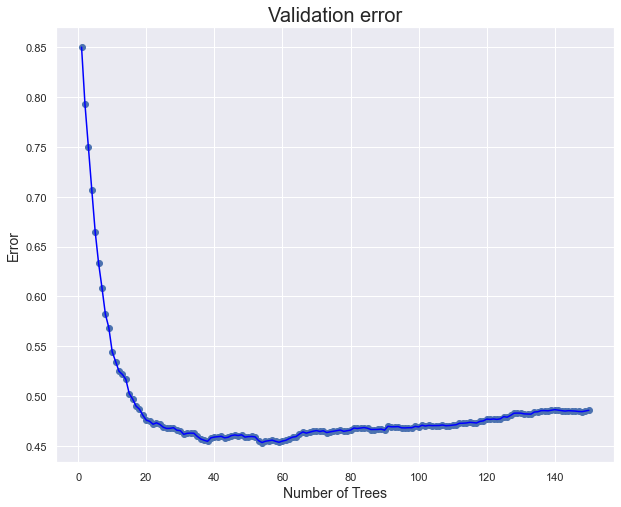

In [12]:
errors = [mean_squared_error(y_test, y_pred)
 for y_pred in gb_reg.staged_predict(X_test)]

plt.figure(figsize=(10, 8))
plt.scatter(range(1,len(errors)+1), errors)
plt.plot(range(1,len(errors)+1), errors, color = "blue")
plt.xlabel('Number of Trees', fontsize = 14)
plt.ylabel('Error', fontsize = 14)
plt.title('Validation error', fontsize = 20)
plt.show()

In [13]:
bst_n_estimators = np.argmin(errors) + 1
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

y_pred = gbrt_best.predict(X_test)

print(f"MSE for gbrt_best is: {mean_squared_error(y_test, y_pred)}")
print(f"The R^2 for gbrt_best is: {round(r2_score(y_test, y_pred), 3)}")

MSE for gbrt_best is: 0.4533168870463858
The R^2 for gbrt_best is: 0.502


The $R^2$ for gradient boosting regressor with diabates data set is greater than 0.50. Compared with k-NN regression and decison tree regression, the performance of gradient boosting regression on diabetes data set is the best.